<a href="https://colab.research.google.com/github/felipenabica/Portfolio/blob/main/ANALISE_EXPLORATORIA_AIRBNB_COPENHAGEN_DENMARK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [41]:
df = pd.read_csv("https://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2023-12-27/visualisations/listings.csv")

## **DICIONARIO DAS VARIAVEIS.**

* **id -**   *NUMERO GERADO PARA IDENTICACAO DA PROPRIEDADE*

* **name -**   *NOME DO ANUNCIO DA PROPRIEDADE*

* **host_id -**  *NUMERO GERADO PARA IDENTIFICACAO DO ANFITRIAO DA PROPRIEDADE*

* **host_name -**  *NOME DO PROPRIETARIO DO IMOVEL*

* **neighbourhood -**  *BAIRRO*

* **latitude -** *COORDENADA DE LATITUDE*

* **longitude -** *COORDENADA DE LONGITUDE*

* **room_type -** *TIPO DE QUARTO OFERECIDO*

* **price -**  *PREÇO*

* **minimum_nights -** *MINIMO DE NOITES PARA ALUGAR*

* **number_of_reviews -**  *QUANTIDADE DE REVIEWS*

* **last_review -**  *DATA DO ULTIMO REVIEW*

* **reviews_per_month -**  *QUANTIDADE DE REVIEWS POR MES*

* **calculated_host_listings_count -** *QUANTIDADE DE IMOVEIS DO MESMO ANFITRIAO*

* **availability_365 -** *NUMERO DE DIAS DISPONIVEIS NO PERIODO DE 12 MESES*

* **number_of_reviews_ltm -** *QUANTIDADE DE AVALIAÇÕES QUE A PROPRIEDADE OBTEVE NOS ULTIMOS 12 MESES*

In [42]:
#VERIFICAR AS 5 PRIMEIRAS ENTRADAS DO DF
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2900.0,5,57,2022-08-09,0.46,1,356,0,NaN
1,26473,Townhouse in Copenhagen · ★4.55 · 6 bedrooms ·...,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3350.0,3,341,2023-12-04,2.12,1,74,37,NaN
2,29118,Rental unit in Copenhagen · ★4.85 · 1 bedroom ...,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,1000.0,7,26,2023-07-18,0.16,1,0,1,NaN
3,318437,Rental unit in Copenhagen · ★4.86 · 1 bedroom ...,1634152,Ditti,NaN,Nrrebro,55.692680,12.554860,Private room,NaN,3,63,2019-09-27,0.63,1,0,0,NaN
4,31094,Condo in Copenhagen · ★4.88 · 4 bedrooms · 2 b...,129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,NaN,3,19,2022-08-22,0.12,1,0,0,NaN


In [43]:
# IDENTIFICAR O VOLUME DE DADOS DO DF
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# VERIFICANDO OS TIPOS DE OBJETOS DO DF
display(df.dtypes)

Entradas:	 18545
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [44]:
#VERIFICAR OS VALORES AUSENTES DE CADA VARIAVEL POR ORDEM DECRESCENTE
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
price                             0.342356
last_review                       0.129469
reviews_per_month                 0.129469
host_name                         0.000054
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

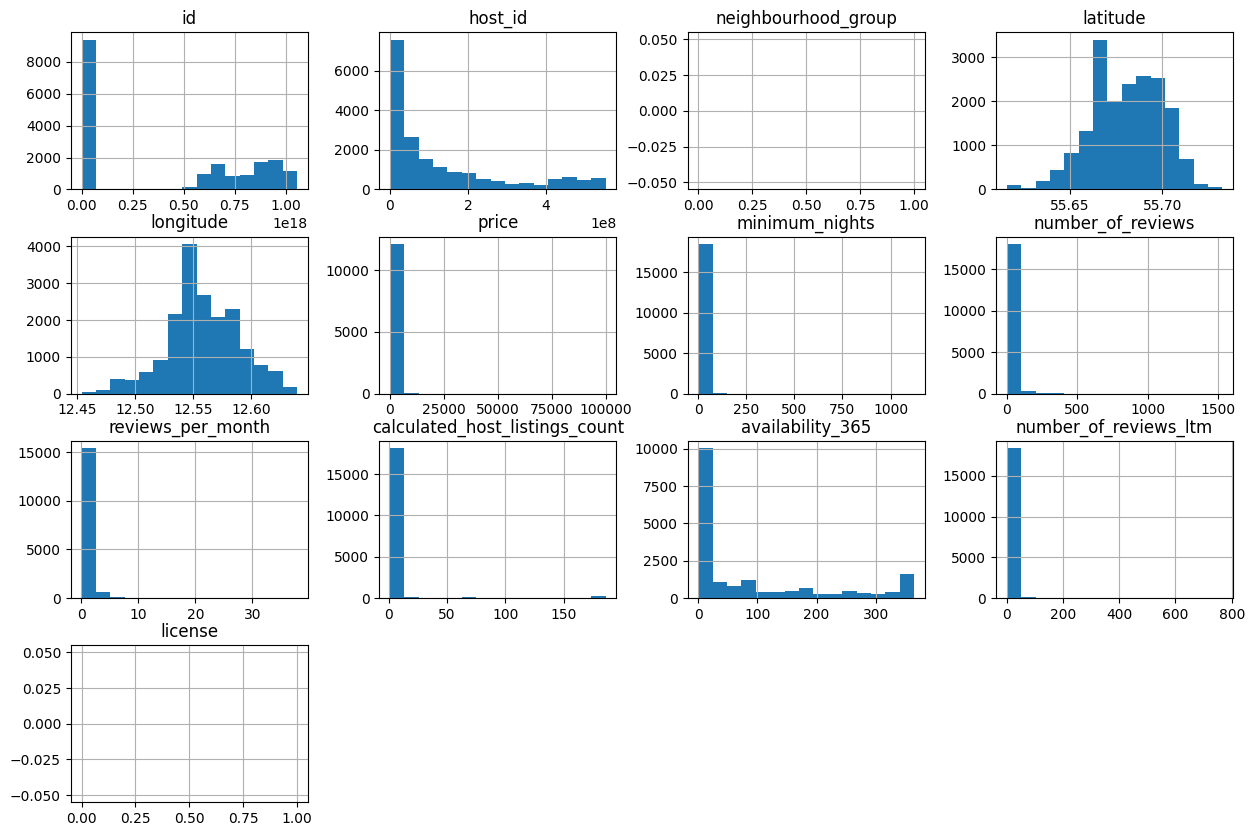

In [45]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

In [46]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,12196.000000,18545.000000,18545.000000,16144.000000,18545.000000,18545.000000,18545.000000
mean,1314.366760,4.555244,17.903208,0.733334,3.598544,85.512321,5.330493
std,1520.828814,18.812196,40.394133,1.001708,19.060369,120.686934,12.243022
min,125.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,825.000000,2.000000,2.000000,0.210000,1.000000,0.000000,0.000000
50%,1100.000000,3.000000,7.000000,0.430000,1.000000,13.000000,2.000000
75%,1500.000000,4.000000,18.000000,0.880000,1.000000,145.000000,6.000000
max,100000.000000,1122.000000,1531.000000,37.860000,186.000000,365.000000,767.000000


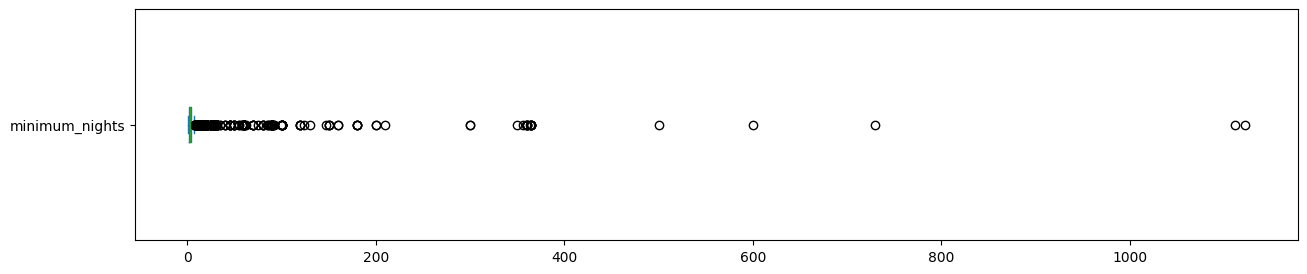

minimum_nights: valores acima de 30:
148 entradas
0.7981%


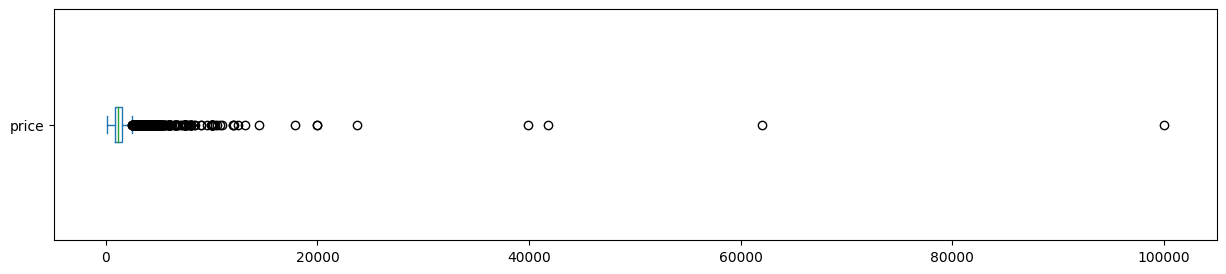

price: valores acima de $5000:
129 entradas
0.6956%


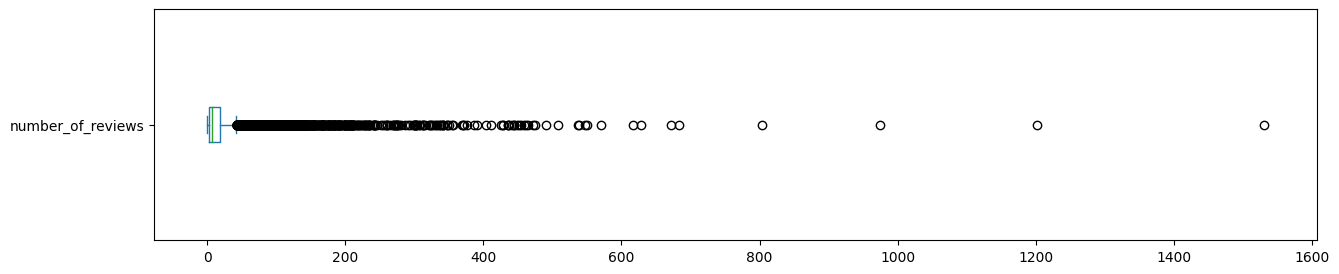

number_of_reviews: valoress acima de 500:
14 entradas
0.0755%


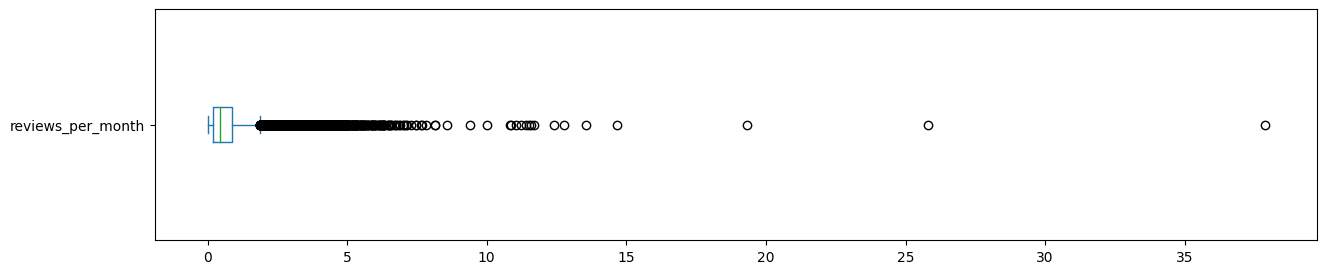

reviews_per_month: valores acima de 15:
3 entradas
0.0162%


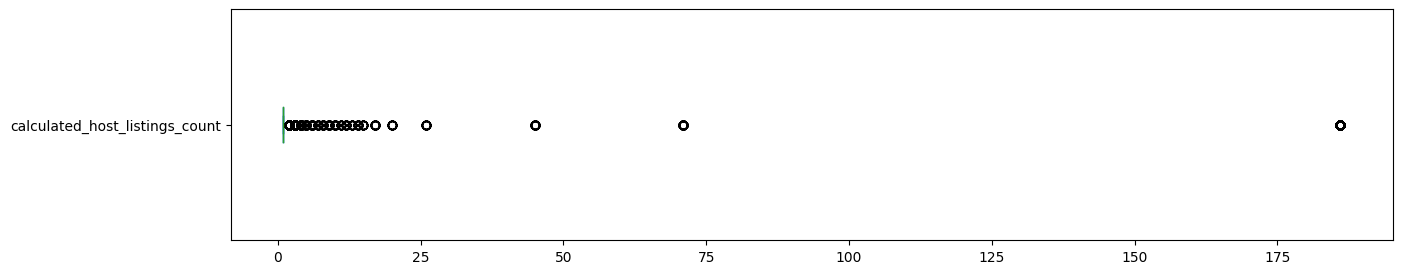

calculated_host_listings_count: valores acima de 30
302 entradas
1.6285%


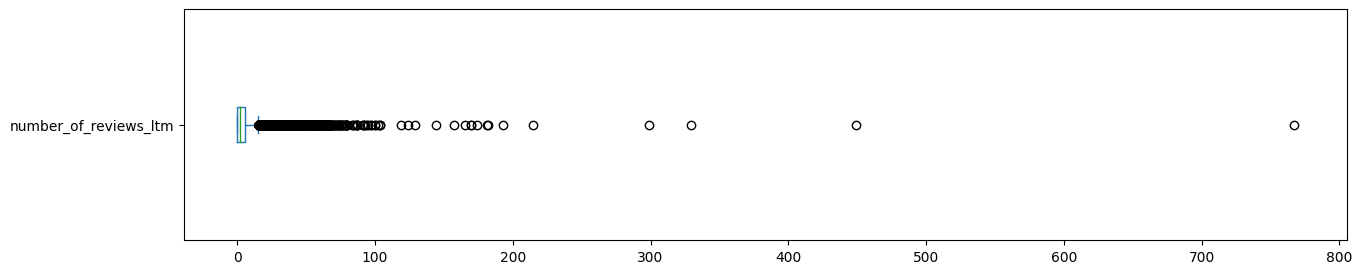

number_of_reviews_ltm: valores acima de 200
5 entradas
0.0270%


In [47]:
#BOXPLOT MINIMUM NIGHTS
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#BOXPLOT PRICE
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("price: valores acima de $5000:")
print("{} entradas".format(len(df[df.price > 5000])))
print("{:.4f}%".format((len(df[df.price > 5000]) / df.shape[0])*100))

#BOXPLOT NUMBER OF REVIEWS
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("number_of_reviews: valoress acima de 500:")
print("{} entradas".format(len(df[df.number_of_reviews > 500])))
print("{:.4f}%".format((len(df[df.number_of_reviews > 500]) / df.shape[0])*100))

#BOXPLOT REVIEWS PER MONTH
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("reviews_per_month: valores acima de 15:")
print("{} entradas".format(len(df[df.reviews_per_month > 15])))
print("{:.4f}%".format((len(df[df.reviews_per_month > 15]) / df.shape[0])*100))

#BOXPLOT CALCULATED HOST LISTINGS COUNT
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("calculated_host_listings_count: valores acima de 30")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 30])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 30]) / df.shape[0])*100))

#BOXPLOT NUMBER OF REVIEWS LTM
df.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("number_of_reviews_ltm: valores acima de 200")
print("{} entradas". format(len(df[df.number_of_reviews_ltm > 200])))
print("{:.4f}%".format((len(df[df.number_of_reviews_ltm > 200]) / df.shape[0])*100))

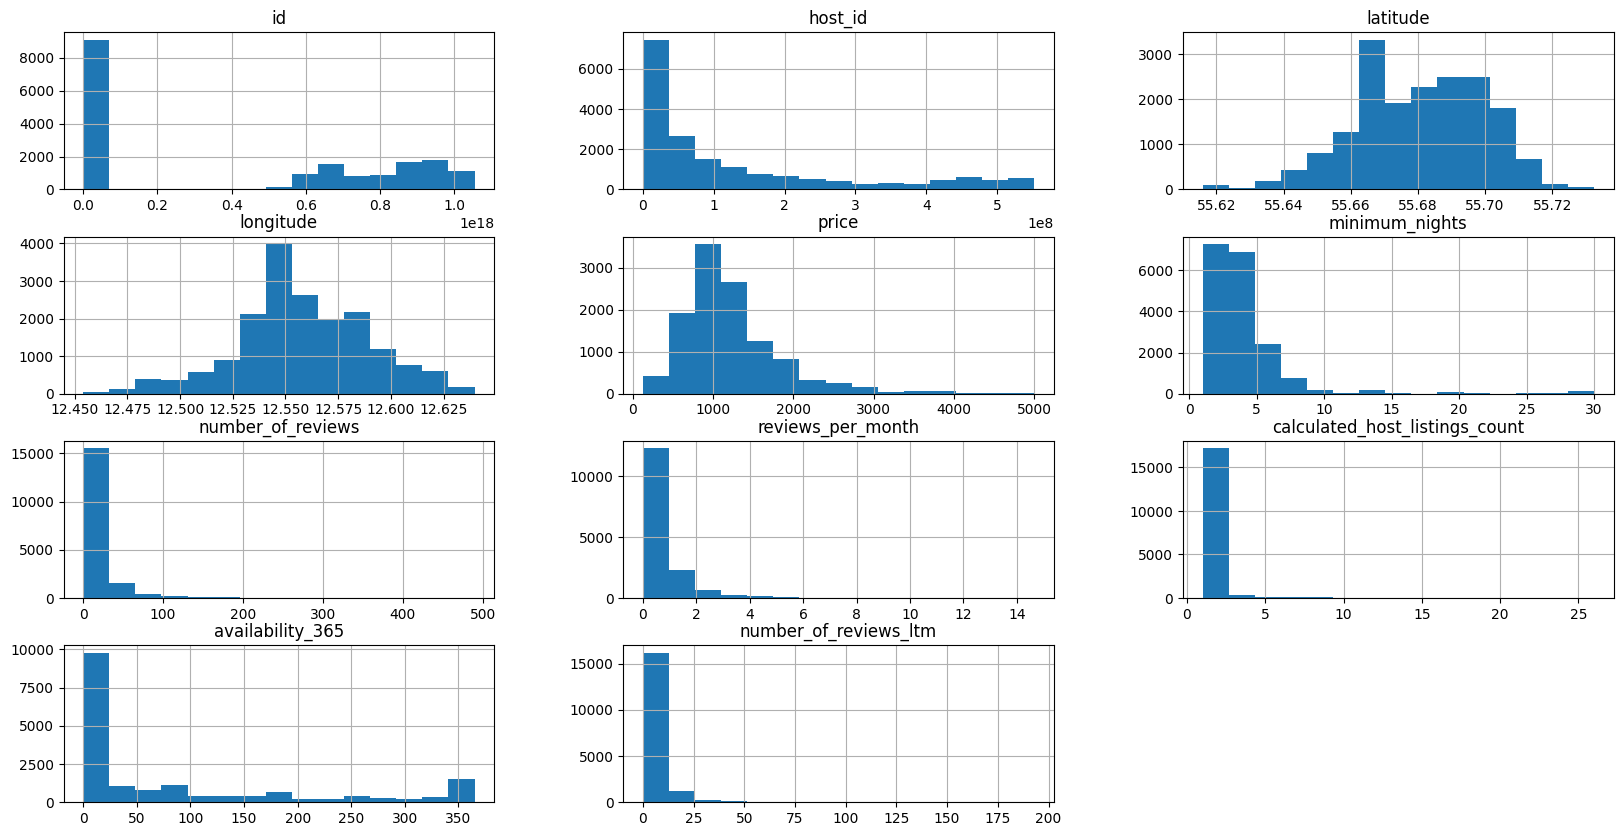

In [48]:
#REMOVER OS OUTLIERS EM UM NOVO DF
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > 200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count> 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 15].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews> 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 5000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#REMOVER VARIAVEIS NULAS
df_clean.drop('license', axis=1, inplace=True)
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#NOVO HISTOGRAMA APOS TRATAMENTO DOS DADOS
df_clean.hist(bins=15, figsize=(20, 10));

In [49]:
#MATRIZ DE CORRELAÇÃO DE VARIAVEIS
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.056590,-0.028996,-0.106306,0.048753,0.206618
minimum_nights,-0.056590,1.000000,-0.076405,-0.181412,0.032928,-0.013020
number_of_reviews,-0.028996,-0.076405,1.000000,0.478613,0.117500,0.048169
reviews_per_month,-0.106306,-0.181412,0.478613,1.000000,0.186687,0.156396
calculated_host_listings_count,0.048753,0.032928,0.117500,0.186687,1.000000,0.151220
availability_365,0.206618,-0.013020,0.048169,0.156396,0.151220,1.000000


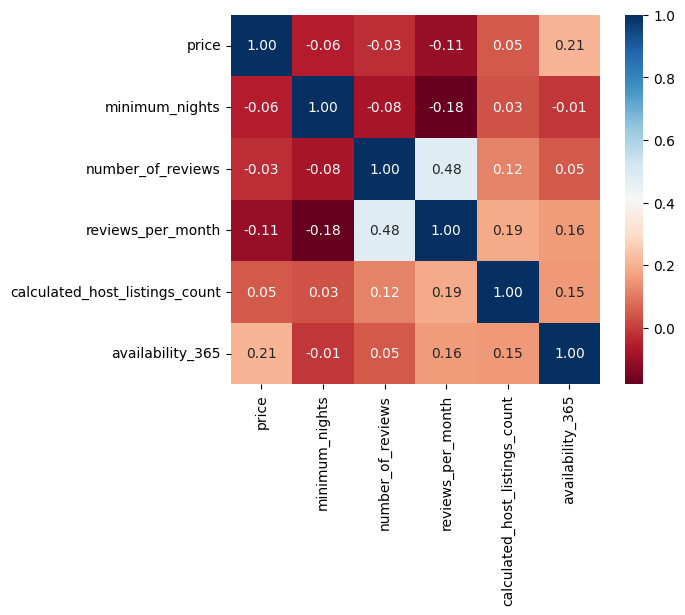

In [50]:
#HEATMAP DA CORRELAÇÃO DAS VARIAVEIS
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [51]:
#CADA TIPO DE QUARTO DISPONIVEL E QUANTIDADE REPRESENTADOS EM %
df_clean.room_type.value_counts() / df_clean.shape[0]

room_type
Entire home/apt    0.902230
Private room       0.096046
Shared room        0.001390
Hotel room         0.000334
Name: count, dtype: float64

In [52]:
#DESCOBRINDO A LOCALIDADE MAIS CARA ATRAVES DA MÉDIA DE VALORES POR BAIRRO EM ORDEM DECRESCENTE
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Indre By                     1630.119469
Frederiksberg                1246.672966
sterbro                      1222.624287
Vesterbro-Kongens Enghave    1210.009728
Amager Vest                  1209.611742
Amager st                    1117.508772
Nrrebro                      1090.713634
Vanlse                        995.106762
Valby                         988.189956
Brnshj-Husum                  963.217391
Bispebjerg                    922.684418
Name: price, dtype: float64

In [53]:
# QUANTIDADE DE IMOVEL DISPONIVEL NO BAIRRO COM A MAIOR MÉDIA
print(df_clean[df_clean.neighbourhood == "Indre By"].shape)
df_clean[df_clean.neighbourhood == "Indre By"].head(3)

(2499, 16)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,Indre By,55.69307,12.57649,Entire home/apt,2900.0,5,57,2022-08-09,0.46,1,356,0
1,26473,Townhouse in Copenhagen · ★4.55 · 6 bedrooms ·...,112210,Julia,Indre By,55.67602,12.57540,Entire home/apt,3350.0,3,341,2023-12-04,2.12,1,74,37
8,519333,Rental unit in Copenhagen · ★5.0 · 2 bedrooms ...,2555736,Lena Weber,Indre By,55.66952,12.58035,Entire home/apt,1075.0,2,35,2023-08-07,0.26,1,3,8


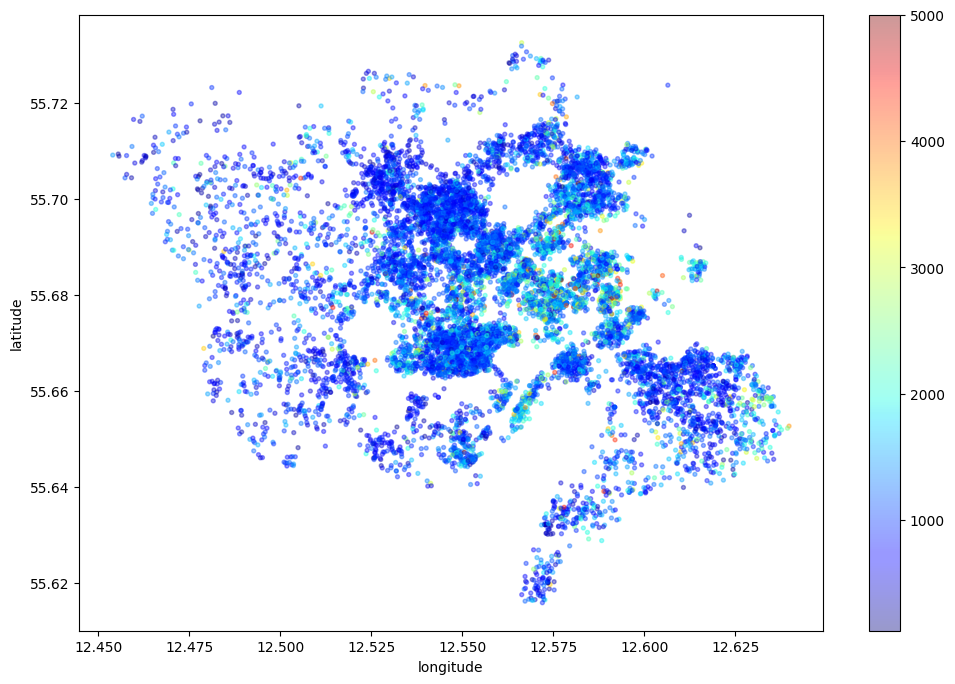

In [54]:
# SCATTERPLOT DE LONGITUDE E LATITUDE DOS IMÓVEIS COM LEGENDA DE CORES BASEADO NO VALOR DE CADA IMOVEL
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **CONCLUSÕES**.

*Após uma rápida analise exploratoria sobre os dados de **Copenhagen** - **Dinamarca**, ficou fácil e claro observar que:*


*   O dataset possuia variaveis **nulas** ou com **outliers** que posteriormente foram tratados.
*   **90,22%** das locações disponiveis em **Copenhagen** são para *'Casa/Apartamento Inteiro'* **negrito**; **9,60%** para *'Quartos Privados'* **negrito**; **0,13%** para ***'Quarto compartilhado'*** e **0,03%** para ***'Quarto de Hotel'***.
*   **'Indre By'** é o bairro com a **maior média de preço** de locação em Copenhagen com o valor de **1.630,11**.
*   **'Bispebjerg'** é o bairro com a **menor média de preço** de locação em Copenhagen com o valor de **922,68**.
*   É possivel notar atráves do **heatmap de correlação** que há grande correlação entre as variaveis ***'Preço' e 'Disponibilidade'*** e de uma correlação entre as variaveis ***'Avaliação' e 'Avaliações por mês'***.
*   **O Preço médio** para locação de imóveis em Copenhagen é de **$1314,36** para uma **média de 4 noites** de estadia.
*   Podemos ver a **distribuição** dos imoveis disponiveis através do *Scatterplot* de **longitude** e **altitude** e a sua representação atraves da **legenda de cores** que indica o **valor** do imovel para locação.
